In [2]:

import pandas as pd
import statistics as stats
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import binom

from scipy.stats import poisson
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

#from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing


In [3]:
#!pip install -U statsmodels

In [4]:
DublinAvgCarsWeekly = pd.read_csv("Average weekly volume of cars for selected traffic count sites.csv")
#https://data.gov.ie/dataset/tha21-average-weekly-volume-of-cars-for-selected-traffic-count-sites

GBData = pd.read_csv("GBData.csv")
#https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic

London = pd.read_csv("tfl-journeys-type.csv")
#https://data.london.gov.uk/dataset/public-transport-journeys-type-transport

Dublin = pd.read_csv("dublin.csv")


DublinBus = pd.read_csv("DublinBus.csv")
#https://data.gov.ie/dataset/tha25-passenger-journeys-by-public-transport
    
DublinLuas = pd.read_csv("DublinLuas.csv")
#https://data.gov.ie/dataset/tii03-passenger-journeys-by-luas

DublinBus2 = pd.read_csv("NonDublinBus.csv")
#https://data.gov.ie/dataset/tha25-passenger-journeys-by-public-transport

DublinRail = pd.read_csv("Rail.csv")
#https://data.gov.ie/dataset/tha25-passenger-journeys-by-public-transport

Australia = pd.read_csv("Aus.csv")


#base statistics of population for city and country. take into consideration wanted to use
#dublin to include dublin bus.... other counties skew bus data as theres no metro bus everyone drives.

In [5]:
Dublin.head(20)

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0
6,THA25C01,Passenger Journeys,2019W02,2019 Week 02,30,Rail,Number,NaN
7,THA25C01,Passenger Journeys,2019W02,2019 Week 02,40,"All public transport, excluding LUAS",Number,3343343.0
8,THA25C01,Passenger Journeys,2019W03,2019 Week 03,10,Dublin Metro Bus,Number,2784678.0
9,THA25C01,Passenger Journeys,2019W03,2019 Week 03,20,"Bus, excluding Dublin Metro",Number,678097.0


In [6]:

Australia["Year"].unique()

array([2018., 2019., 2020., 2021., 2022., 2023.,   nan])

In [7]:
Australia1 = Australia.isna()
print(Australia1)

     Year  Month  Month name  Metropolitan train  Metropolitan tram  \
0   False  False       False               False              False   
1   False  False       False               False              False   
2   False  False       False               False              False   
3   False  False       False               False              False   
4   False  False       False               False              False   
..    ...    ...         ...                 ...                ...   
71   True   True        True                True               True   
72   True   True        True                True               True   
73   True   True        True                True               True   
74   True   True        True                True               True   
75   True   True        True                True               True   

    Metropolitan bus  Regional train  Regional coach  Regional bus  \
0              False           False           False         False   
1      

In [8]:

Australia = Australia.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis = 1)

In [9]:
Australia = Australia.dropna()
#Rows with NAN dropped

In [10]:
DublinAvgCarsWeekly.head()

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,463064.0
1,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,534609.0
2,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,549470.0
3,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,550892.0
4,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,543468.0


In [11]:
GBData.head()

,date,transport_type,value
0,2020-03-01,cars,1.03
1,2020-03-01,light_commercial_vehicles,1.11
2,2020-03-01,heavy_goods_vehicles,1.08
3,2020-03-01,all_motor_vehicles,1.04
4,2020-03-01,tfl_tube,1.03


In [12]:
GBData["date"].unique()
#need to change daily to average weekly values and maybe get percentage of the population
#do i just want car values?

array(['2020-03-01', '2020-03-02', '2020-03-03', ..., '2023-12-09',
       '2023-12-10', '2023-12-11'], dtype=object)

In [13]:
London.tail(50)
#compare 2019 - 2023 for bus trains trams. take into consideration the proportion of london goers that take the,
#underground as this takes away from other transport and have it as a percentage.

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
127,11_19/20,11,28,05-Jan-20,01-Feb-20,169.4,105.8,9.2,2.3,14.1,0.1,5.7
128,12_19/20,12,28,02-Feb-20,29-Feb-20,165.2,106.2,9.3,2.2,15.6,0.1,5.2
129,13_19/20,13,29,01-Mar-20,31-Mar-20,126.4,60.9,6.1,1.6,13.0,0.0,3.5
130,01_19/20,1,28,01-Apr-20,02-May-20,30.2,5.7,1.2,0.4,1.0,0.0,0.6
131,02_19/20,2,28,03-May-20,30-May-20,32.5,6.7,1.4,0.5,1.5,0.0,0.7
132,03_19/20,3,28,31-May-20,27-Jun-20,47.0,13.3,2.1,0.7,2.8,0.0,1.2
133,04_19/20,4,28,28-Jun-20,25-Jul-20,66.7,22.2,2.9,1.0,4.5,0.0,1.6
134,05_19/20,5,28,26-Jul-20,22-Aug-20,75.2,28.8,3.6,1.0,5.1,0.1,2.0
135,06_19/20,6,28,23-Aug-20,19-Sep-20,94.8,36.3,4.2,1.2,6.6,0.1,2.2
136,07_19/20,7,28,20-Sep-20,17-Oct-20,102.0,39.5,4.5,1.4,8.5,0.0,2.5


In [14]:
London = London.drop(columns=['Period and Financial year', 'Reporting Period', 'Overground Journeys (m)',
                              'London Cable Car Journeys (m)', 'TfL Rail Journeys (m)', 'Period ending', 'Period ending', 'Days in period'], axis = 1)
London.head()

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
0,01-Apr-10,189.1,90.5,6.3,2.3
1,02-May-10,181.6,84.5,5.8,2.2
2,30-May-10,175.9,84.3,5.8,2.1
3,27-Jun-10,183.4,86.5,6.1,2.1
4,25-Jul-10,160.4,82.9,5.8,2.0


In [15]:
London['Period beginning'] = London['Period beginning'].str.slice(3)
London = London.iloc[114:,:]

#Removing rows up to Jan 2019

In [16]:
London

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
114,Jan-19,171.3,106.7,9.3,2.2
115,Feb-19,171.3,110.8,9.7,2.2
116,Mar-19,182.7,114.1,10.0,2.2
117,Apr-19,156.6,101.2,8.9,2.0
118,Apr-19,175.2,106.1,9.7,2.2
...,...,...,...,...,...
172,Jun-23,147.1,94.1,7.9,1.6
173,Jul-23,129.7,86.6,7.2,1.4
174,Aug-23,139.6,83.7,7.3,1.7
175,Sep-23,155.4,93.4,8.3,1.6


In [17]:
DublinTransportData = DublinBus

In [18]:
DublinTransportData.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0


In [19]:
DublinLuas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553


In [20]:
DublinLuas["Statistic Label"].unique()

array(['Red line', 'Green line', 'All Luas lines'], dtype=object)

In [21]:
Column_names = DublinLuas.columns.values.tolist()
Column_names

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'Year',
 'C01885V02316',
 'Month',
 'UNIT',
 'VALUE']

In [22]:
DublinLuas1 = DublinLuas.drop(columns=['STATISTIC', 'TLIST(A1)', 'C01885V02316', 'UNIT'], axis = 1)
DublinLuas1

,Statistic Label,Year,Month,VALUE
0,Red line,2018,January,1664495
1,Red line,2018,February,1657562
2,Red line,2018,March,1661098
3,Red line,2018,April,1794424
4,Red line,2018,May,1934553
...,...,...,...,...
190,All Luas lines,2022,September,3811093
191,All Luas lines,2022,October,4219124
192,All Luas lines,2022,November,4375705
193,All Luas lines,2022,December,4030698


In [23]:
DublinLuas1 = DublinLuas1[DublinLuas1["Statistic Label"].str.contains("All Luas lines") == True]
DublinLuas1

,Statistic Label,Year,Month,VALUE
130,All Luas lines,2018,January,3218649
131,All Luas lines,2018,February,3118289
132,All Luas lines,2018,March,3097570
133,All Luas lines,2018,April,3350056
134,All Luas lines,2018,May,3622338
...,...,...,...,...
190,All Luas lines,2022,September,3811093
191,All Luas lines,2022,October,4219124
192,All Luas lines,2022,November,4375705
193,All Luas lines,2022,December,4030698


In [24]:
Dublin

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
...,...,...,...,...,...,...,...,...
1035,THA25C01,Passenger Journeys,2023W47,2023 Week 47,40,"All public transport, excluding LUAS",Number,5059620.0
1036,THA25C01,Passenger Journeys,2023W48,2023 Week 48,10,Dublin Metro Bus,Number,3453532.0
1037,THA25C01,Passenger Journeys,2023W48,2023 Week 48,20,"Bus, excluding Dublin Metro",Number,941393.0
1038,THA25C01,Passenger Journeys,2023W48,2023 Week 48,30,Rail,Number,942218.0


In [25]:
Dublin1 = London

In [26]:
Dublin1

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
114,Jan-19,171.3,106.7,9.3,2.2
115,Feb-19,171.3,110.8,9.7,2.2
116,Mar-19,182.7,114.1,10.0,2.2
117,Apr-19,156.6,101.2,8.9,2.0
118,Apr-19,175.2,106.1,9.7,2.2
...,...,...,...,...,...
172,Jun-23,147.1,94.1,7.9,1.6
173,Jul-23,129.7,86.6,7.2,1.4
174,Aug-23,139.6,83.7,7.3,1.7
175,Sep-23,155.4,93.4,8.3,1.6


In [27]:
Dublin1 = Dublin1.iloc[114:,:]

In [28]:
Dublin1

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)


In [29]:
London.head(60)

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
114,Jan-19,171.3,106.7,9.3,2.2
115,Feb-19,171.3,110.8,9.7,2.2
116,Mar-19,182.7,114.1,10.0,2.2
117,Apr-19,156.6,101.2,8.9,2.0
118,Apr-19,175.2,106.1,9.7,2.2
119,May-19,171.4,108.0,9.3,2.2
120,Jun-19,177.0,111.7,9.6,2.3
121,Jul-19,149.8,103.0,9.1,2.0
122,Aug-19,159.8,99.4,8.7,1.6
123,Sep-19,179.3,112.2,9.5,2.3


In [30]:
London2 = London

London2['Period beginning'] = London2['Period beginning'].str.slice(4)
London2
#London2019 = London2.loc[London2["Period beginning"]  == 19]

#London2019 
#London2020
London2.dtypes#London2021
#London2022

Period beginning             object
Bus journeys (m)            float64
Underground journeys (m)    float64
DLR Journeys (m)            float64
Tram Journeys (m)           float64
dtype: object

In [31]:
#London2.dtypes



London2019 = London2.loc[London2['Period beginning'] =="19"]
London2020 = London2.loc[London2['Period beginning'] =="20"]
London2021 = London2.loc[London2['Period beginning'] =="21"]
London2022 = London2.loc[London2['Period beginning'] =="22"]



In [32]:
London2019.describe()

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
count,13.000000,13.000000,13.000000,13.000000
mean,167.730769,107.323077,9.315385,2.123077
std,12.364289,7.196661,0.675581,0.200640
min,141.000000,91.200000,7.500000,1.600000
25%,159.800000,103.000000,9.100000,2.000000
50%,171.300000,108.000000,9.500000,2.200000
75%,176.200000,112.200000,9.700000,2.200000
max,182.700000,117.500000,10.000000,2.300000


In [33]:
London2020.describe()

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
count,13.000000,13.000000,13.000000,13.000000
mean,88.061538,39.230769,4.253846,1.161538
std,44.678696,33.099884,2.586380,0.588130
min,30.200000,5.700000,1.200000,0.400000
25%,57.500000,18.800000,2.700000,0.700000
50%,88.900000,32.100000,4.000000,1.000000
75%,102.000000,39.500000,4.500000,1.400000
max,169.400000,106.200000,9.300000,2.300000


In [34]:
London2021.describe()

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
count,13.000000,13.000000,13.000000,13.000000
mean,99.538462,47.038462,5.176923,1.307692
std,25.660460,19.548083,1.482764,0.322649
min,51.600000,16.800000,2.700000,0.700000
25%,95.100000,37.400000,4.600000,1.200000
50%,104.300000,48.600000,5.400000,1.300000
75%,115.500000,58.200000,5.900000,1.500000
max,131.300000,75.800000,7.200000,1.700000


In [35]:
London2022.describe()

,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
count,13.000000,13.000000,13.000000,13.000000
mean,133.669231,77.015385,6.800000,1.561538
std,9.556532,9.897040,0.665833,0.132530
min,116.900000,60.200000,5.700000,1.300000
25%,126.700000,70.400000,6.500000,1.500000
50%,135.000000,79.200000,6.600000,1.600000
75%,140.500000,81.300000,7.600000,1.600000
max,147.000000,95.100000,7.700000,1.800000


In [36]:
#London20222 = London2022[['Bus journeys (m)']].mean(axis=1)
London20222 = London2022.loc[:, 'Bus journeys (m)'].mean().round(2)
London20222

133.67

In [37]:
L2019BusMean = London2019.loc[:, 'Bus journeys (m)'].mean().round(2)
L2019UndergroundMean = London2019.loc[:, 'Underground journeys (m)'].mean().round(2)
L2019DLRMean = London2019.loc[:, 'DLR Journeys (m)'].mean().round(2)
L2019TramMean = London2019.loc[:, 'Tram Journeys (m)'].mean().round(2)

L2020BusMean = London2020.loc[:, 'Bus journeys (m)'].mean().round(2)
L2020UndergroundMean = London2020.loc[:, 'Underground journeys (m)'].mean().round(2)
L2020DLRMean = London2020.loc[:, 'DLR Journeys (m)'].mean().round(2)
L2020TramMean = London2020.loc[:, 'Tram Journeys (m)'].mean().round(2)

L2021BusMean = London2021.loc[:, 'Bus journeys (m)'].mean().round(2)
L2021UndergroundMean = London2021.loc[:, 'Underground journeys (m)'].mean().round(2)
L2021DLRMean = London2021.loc[:, 'DLR Journeys (m)'].mean().round(2)
L2021TramMean = London2021.loc[:, 'Tram Journeys (m)'].mean().round(2)

L2022BusMean = London2022.loc[:, 'Bus journeys (m)'].mean().round(2)
L2022UndergroundMean = London2022.loc[:, 'Underground journeys (m)'].mean().round(2)
L2022DLRMean = London2022.loc[:, 'DLR Journeys (m)'].mean().round(2)
L2022TramMean = London2022.loc[:, 'Tram Journeys (m)'].mean().round(2)


Get mean of 2019-2022 of 3 countries and put it as a proportion of population the graph 3 lines for 4 years with percentage proportion in a line graph. have colours as national colours to make it more readable.

In [38]:
Australia

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018.0,1.0,January,"16,809,932","15,231,368","7,568,547","1,466,256","116,568","721,229"
1,2018.0,2.0,February,"19,554,477","16,980,925","10,487,311","1,522,981","103,197","1,118,494"
2,2018.0,3.0,March,"22,659,010","19,832,126","11,528,895","1,809,774","117,180","1,224,816"
3,2018.0,4.0,April,"20,312,040","16,919,872","9,592,750","1,684,827","107,480","946,218"
4,2018.0,5.0,May,"22,768,447","17,691,427","11,263,486","1,790,656","109,456","1,258,704"
...,...,...,...,...,...,...,...,...,...
66,2023.0,7.0,July,"14,020,167","12,335,062","9,219,892","1,846,565","99,755","1,148,259"
67,2023.0,8.0,August,"16,437,412","13,280,460","10,304,037","1,807,251","98,413","1,255,113"
68,2023.0,9.0,September,"14,847,177","12,149,257","9,260,131","1,775,964","100,982","1,103,635"
69,2023.0,10.0,October,"15,199,277","12,453,509","10,083,249","1,849,701","106,717","1,242,909"


In [39]:
Australia = Australia.iloc[12:]
#Australia.drop(Australia.tail(10).index,
        #inplace = True)
Australia.column


AttributeError: 'DataFrame' object has no attribute 'column'

In [ ]:
column_headers = list(Australia.columns.values)
print("The Column Header :", column_headers)

In [40]:
Australia2019 = Australia.loc[Australia['Year'] ==2019.0]
Australia2020 = Australia.loc[Australia['Year'] ==2020.0]
Australia2021 = Australia.loc[Australia['Year'] ==2021.0]
Australia2022 = Australia.loc[Australia['Year'] ==2022.0]


In [41]:
#Australia.dtypes
Australia.replace(',','', regex=True, inplace=True)
#Australia['Metropolitan train'] = Australia['Metropolitan train'].astype(int)
#removing comma to make string into int

C:\Users\leega\AppData\Local\Temp\ipykernel_10372\2790097635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Australia.replace(',','', regex=True, inplace=True)


In [42]:
Australia['Metropolitan train'] = Australia['Metropolitan train'].astype(int)
Australia['Metropolitan tram'] = Australia['Metropolitan tram'].astype(int)
Australia['Metropolitan bus'] = Australia['Metropolitan bus'].astype(int)
Australia['Regional train'] = Australia['Regional train'].astype(int)
Australia['Regional coach'] = Australia['Regional coach'].astype(int)
Australia['Regional bus'] = Australia['Regional bus'].astype(int)

C:\Users\leega\AppData\Local\Temp\ipykernel_10372\1964807782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Australia['Metropolitan train'] = Australia['Metropolitan train'].astype(int)
C:\Users\leega\AppData\Local\Temp\ipykernel_10372\1964807782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Australia['Metropolitan tram'] = Australia['Metropolitan tram'].astype(int)
C:\Users\leega\AppData\Local\Temp\ipykernel_10372\1964807782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [43]:
Australia2019 = Australia.loc[Australia['Year'] ==2019.0]
Australia2020 = Australia.loc[Australia['Year'] ==2020.0]
Australia2021 = Australia.loc[Australia['Year'] ==2021.0]
Australia2022 = Australia.loc[Australia['Year'] ==2022.0]

In [44]:
Australia.dtypes
Australia2019

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
12,2019.0,1.0,January,17074623,15695535,7845144,1532342,110708,748369
13,2019.0,2.0,February,20011823,16485000,10105546,1676391,103886,1201991
14,2019.0,3.0,March,22250796,19456794,11775566,1916630,112302,1232933
15,2019.0,4.0,April,18579825,17400302,9667587,1722745,111012,961318
16,2019.0,5.0,May,23045436,18410816,12082141,2007166,111604,1287180
17,2019.0,6.0,June,19099513,15041547,9515676,1704331,98137,1084632
18,2019.0,7.0,July,20771347,16784796,10417277,1898701,108706,1083306
19,2019.0,8.0,August,22618021,17578879,11485155,1981136,107987,1275349
20,2019.0,9.0,September,20593343,15733247,10238956,1805116,104419,1089826
21,2019.0,10.0,October,22429337,16917616,11294945,1927784,115819,1212228


In [45]:
A2019BusMean = (Australia2019.loc[:, 'Metropolitan bus'].mean() + Australia2019.loc[:, 'Regional bus'].mean() + Australia2019.loc[:, 'Regional coach'].mean()).round(2)
A2019Train = (Australia2019.loc[:, 'Metropolitan train'].mean() + Australia2019.loc[:, 'Regional train'].mean()).round(2)
A2019Tram = Australia2019.loc[:, 'Metropolitan tram'].mean().round(2) 

A2020BusMean = (Australia2020.loc[:, 'Metropolitan bus'].mean() + Australia2020.loc[:, 'Regional bus'].mean() + Australia2020.loc[:, 'Regional coach'].mean()).round(2)
A2020Train = (Australia2020.loc[:, 'Metropolitan train'].mean() + Australia2020.loc[:, 'Regional train'].mean()).round(2)
A2020Tram = Australia2020.loc[:, 'Metropolitan tram'].mean().round(2) 

A2021BusMean = (Australia2021.loc[:, 'Metropolitan bus'].mean() + Australia2021.loc[:, 'Regional bus'].mean() + Australia2021.loc[:, 'Regional coach'].mean()).round()
A2021Train = (Australia2021.loc[:, 'Metropolitan train'].mean() + Australia2021.loc[:, 'Regional train'].mean()).round()
A2021Tram = Australia2021.loc[:, 'Metropolitan tram'].mean().round(2) 

A2022BusMean = (Australia2022.loc[:, 'Metropolitan bus'].mean() + Australia2022.loc[:, 'Regional bus'].mean() + Australia2022.loc[:, 'Regional coach'].mean()).round(2)
A2022Train = (Australia2022.loc[:, 'Metropolitan train'].mean() + Australia2022.loc[:, 'Regional train'].mean()).round(2)
A2022Tram = Australia2022.loc[:, 'Metropolitan tram'].mean().round(2) 

In [46]:
L2019TramMean

2.12

In [47]:
DublinBus

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0
...,...,...,...,...,...,...,...,...,...,...
1055,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",49,Week 49,Number,NaN
1056,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",50,Week 50,Number,NaN
1057,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",51,Week 51,Number,NaN
1058,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",52,Week 52,Number,NaN


In [48]:
DublinBus2

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0
...,...,...,...,...,...,...,...,...,...,...
1055,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",49,Week 49,Number,NaN
1056,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",50,Week 50,Number,NaN
1057,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",51,Week 51,Number,NaN
1058,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",52,Week 52,Number,NaN


In [49]:
DublinRail

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
...,...,...,...,...,...,...,...,...
1035,THA25C01,Passenger Journeys,2023W47,2023 Week 47,40,"All public transport, excluding LUAS",Number,5059620.0
1036,THA25C01,Passenger Journeys,2023W48,2023 Week 48,10,Dublin Metro Bus,Number,3453532.0
1037,THA25C01,Passenger Journeys,2023W48,2023 Week 48,20,"Bus, excluding Dublin Metro",Number,941393.0
1038,THA25C01,Passenger Journeys,2023W48,2023 Week 48,30,Rail,Number,942218.0


In [50]:
DublinLuas = DublinLuas[ DublinLuas[ 'Statistic Label' ].str.contains('All Luas lines')==True ]
DublinLuas = DublinLuas[ DublinLuas[ 'Month' ].str.contains('All months')==False ]

DublinLuas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
130,TOA11C03,All Luas lines,2018,2018,01,January,Number,3218649
131,TOA11C03,All Luas lines,2018,2018,02,February,Number,3118289
132,TOA11C03,All Luas lines,2018,2018,03,March,Number,3097570
133,TOA11C03,All Luas lines,2018,2018,04,April,Number,3350056
134,TOA11C03,All Luas lines,2018,2018,05,May,Number,3622338


In [51]:
Dublin2019 = DublinLuas.loc[DublinLuas['Year'] ==2019]
Dublin2020 = DublinLuas.loc[DublinLuas['Year'] ==2020]
Dublin2021 = DublinLuas.loc[DublinLuas['Year'] ==2021]
Dublin2022 = DublinLuas.loc[DublinLuas['Year'] ==2022]


D2019TramMean = Dublin2019.loc[:, 'VALUE'].mean().round(2)
D2020TramMean = Dublin2020.loc[:, 'VALUE'].mean().round(2)
D2021TramMean = Dublin2021.loc[:, 'VALUE'].mean().round(2)
D2022TramMean = Dublin2022.loc[:, 'VALUE'].mean().round(2)

In [52]:
D2019TramMean, D2020TramMean, D2021TramMean, D2022TramMean,L2019TramMean, A2019Tram

(4028935.92, 1598004.67, 1623443.25, 3222322.92, 2.12, 16548792.92)

In [53]:
#getting a proportion of the public transport mean against yearly population of the area

In [54]:
D2019pop = (D2019TramMean/1215000*25357170).round(2)
D2020pop = (D2020TramMean/1228000*25670051).round(2)
D2021pop = (D2021TramMean/1242000*25921089).round(2)
D2022pop = (D2022TramMean/1256000*26177413).round(2)

A2019pop = (A2019Tram).round(2)
A2020pop = (A2020Tram).round(2)
A2021pop = (A2021Tram).round(2)
A2022pop = (A2022Tram).round(2)

L2019pop = (L2019TramMean/9.177000*25357170).round(2)
L2020pop = (L2020TramMean/9.304000*25670051).round(2)
L2021pop = (L2021TramMean/9.426000*25921089).round(2)
L2022pop = (L2022TramMean/9.541000*26177413).round(2)

#values for london in (m) need to divide with decimal

In [55]:
D2019pop, A2019pop, L2019pop

(84084290.57, 16548792.92, 5857818.5)

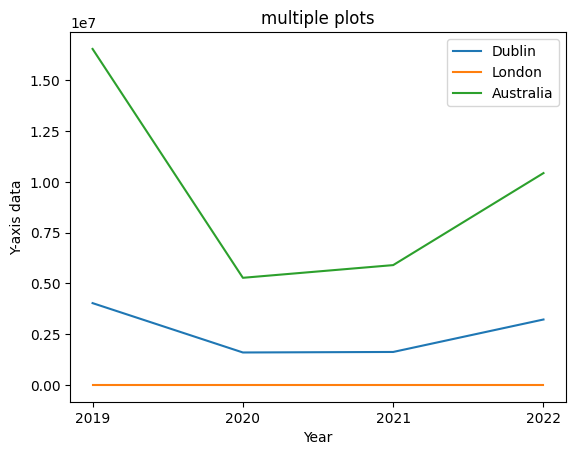

In [56]:

x=["2019","2020","2021","2022"]
y1=[D2019TramMean,D2020TramMean,D2021TramMean,D2022TramMean]
y2=[L2019TramMean,L2020TramMean,L2021TramMean,L2022TramMean]
y3=[A2019Tram,A2020Tram,A2021Tram,A2022Tram]

plt.plot(x, y1, label ='Dublin')
plt.plot(x, y2,  label ='London')
plt.plot(x, y3,  label ='Australia')

plt.xlabel("Year")
plt.ylabel("Y-axis data")
plt.legend()
plt.title('multiple plots')
plt.show()

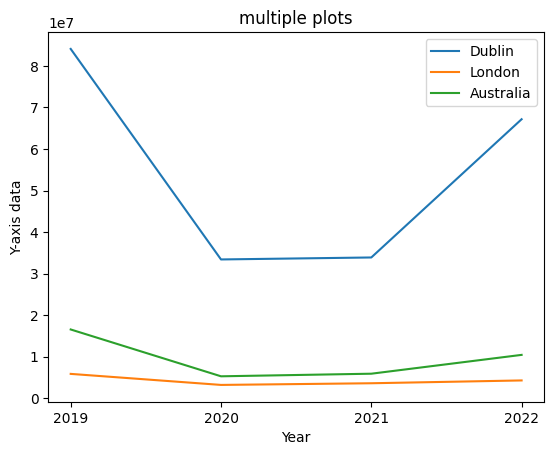

In [57]:

x=["2019","2020","2021","2022"]
y1=[D2019pop,D2020pop,D2021pop,D2022pop]
y2=[L2019pop,L2020pop,L2021pop,L2022pop]
y3=[A2019pop,A2020pop,A2021pop,A2022pop]

plt.plot(x, y1, label ='Dublin')
plt.plot(x, y2,  label ='London')
plt.plot(x, y3,  label ='Australia')

plt.xlabel("Year")
plt.ylabel("Y-axis data")
plt.legend()
plt.title('multiple plots')
plt.show()


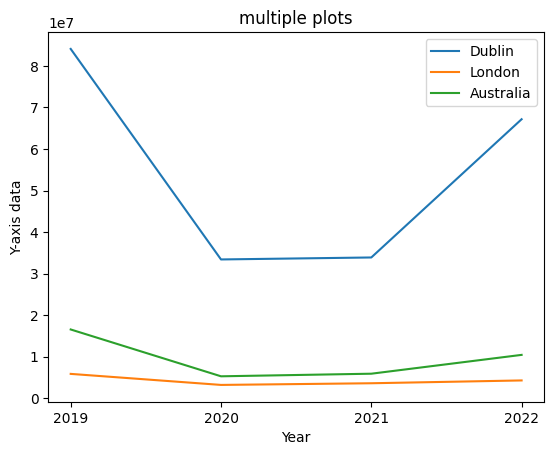

In [58]:
x=["2019","2020","2021","2022"]
y1=[D2019pop,D2020pop,D2021pop,D2022pop]
y2=[L2019pop,L2020pop,L2021pop,L2022pop]
y3=[A2019pop,A2020pop,A2021pop,A2022pop]

plt.plot(x, y1, label ='Dublin')
plt.plot(x, y2,  label ='London')
plt.plot(x, y3,  label ='Australia')

plt.xlabel("Year")
plt.ylabel("Y-axis data")
plt.legend()
plt.title('multiple plots')
plt.show()


In [59]:


data = London2019['Tram Journeys (m)']
data

114    2.2
115    2.2
116    2.2
117    2.0
118    2.2
119    2.2
120    2.3
121    2.0
122    1.6
123    2.3
124    2.2
125    2.3
126    1.9
Name: Tram Journeys (m), dtype: float64

In [60]:
import scipy.stats as st
import numpy as np

#confidence interval London 2019
data1 = [2.2, 2.2, 2.2, 2.0, 2.2, 2.2, 2.3, 2.0, 1.6, 2.3, 2.2, 2.3, 1.9]

#create 95% confidence interval for population mean of London 2019
st.t.interval(0.95, len(data1)-1, loc=np.mean(data1), scale=st.sem(data1))


#(16.758, 24.042)

(2.0018313835438613, 2.244322462609985)

In [61]:
London2019

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
114,19,171.3,106.7,9.3,2.2
115,19,171.3,110.8,9.7,2.2
116,19,182.7,114.1,10.0,2.2
117,19,156.6,101.2,8.9,2.0
118,19,175.2,106.1,9.7,2.2
119,19,171.4,108.0,9.3,2.2
120,19,177.0,111.7,9.6,2.3
121,19,149.8,103.0,9.1,2.0
122,19,159.8,99.4,8.7,1.6
123,19,179.3,112.2,9.5,2.3


In [62]:
Dublin2019

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
143,TOA11C03,All Luas lines,2019,2019,01,January,Number,3658484
144,TOA11C03,All Luas lines,2019,2019,02,February,Number,3727609
145,TOA11C03,All Luas lines,2019,2019,03,March,Number,4069124
146,TOA11C03,All Luas lines,2019,2019,04,April,Number,3826763
147,TOA11C03,All Luas lines,2019,2019,05,May,Number,4003472
148,TOA11C03,All Luas lines,2019,2019,06,June,Number,3750724
149,TOA11C03,All Luas lines,2019,2019,07,July,Number,4130610
150,TOA11C03,All Luas lines,2019,2019,08,August,Number,3781395
151,TOA11C03,All Luas lines,2019,2019,09,September,Number,4166802
152,TOA11C03,All Luas lines,2019,2019,10,October,Number,4502319


In [63]:
#confidence interval Dublin 2019
data2 = [3.7, 3.7, 4.1, 3.8, 4.0, 3.8, 4.1, 3.8, 4.2, 4.5, 4.5, 4.2]

#create 95% confidence interval for population mean of London 2019
st.t.interval(0.95, len(data2)-1, loc=np.mean(data2), scale=st.sem(data2))




(3.8529442134176355, 4.213722453249033)

In [64]:
Australia2019

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
12,2019.0,1.0,January,17074623,15695535,7845144,1532342,110708,748369
13,2019.0,2.0,February,20011823,16485000,10105546,1676391,103886,1201991
14,2019.0,3.0,March,22250796,19456794,11775566,1916630,112302,1232933
15,2019.0,4.0,April,18579825,17400302,9667587,1722745,111012,961318
16,2019.0,5.0,May,23045436,18410816,12082141,2007166,111604,1287180
17,2019.0,6.0,June,19099513,15041547,9515676,1704331,98137,1084632
18,2019.0,7.0,July,20771347,16784796,10417277,1898701,108706,1083306
19,2019.0,8.0,August,22618021,17578879,11485155,1981136,107987,1275349
20,2019.0,9.0,September,20593343,15733247,10238956,1805116,104419,1089826
21,2019.0,10.0,October,22429337,16917616,11294945,1927784,115819,1212228


In [65]:
#confidence interval Australia 2019
data3 = [15.7, 16.5, 19.5, 17.4, 18.4, 15.0, 16.8, 17.6, 15.7, 16.9, 15.3, 13.7]

#create 95% confidence interval for population mean of London 2019
st.t.interval(0.95, len(data3)-1, loc=np.mean(data3), scale=st.sem(data3))

(15.533973790256175, 17.54935954307716)

In [66]:
import scipy
from scipy.stats import ttest_ind
scipy.stats.ttest_ind(Australia2019['Metropolitan tram'], London2019['Tram Journeys (m)'], equal_var=False)

TtestResult(statistic=36.63930020022628, pvalue=7.544556780329852e-13, df=11.00000000000033)

In [67]:
 scipy.stats.ttest_ind( Dublin2019['VALUE'], London2019['Tram Journeys (m)'], equal_var=False)

TtestResult(statistic=48.15933801697137, pvalue=3.794270299047897e-14, df=11.000000000009733)

In [68]:
 scipy.stats.ttest_ind( Dublin2019['VALUE'], Australia2019['Metropolitan tram'], equal_var=False)

TtestResult(statistic=-27.2555888292569, pvalue=5.466334041849475e-12, df=11.753863795893373)

In [69]:
#Anova not ideal as we have the full population statistics and this is used for sample populations generally


from scipy.stats import f_oneway

#ANOVA test for tram means year on year
A19 = Australia2019["Metropolitan tram"]
D19 = Dublin2019["VALUE"]
L19 = London2019["Tram Journeys (m)"]

statistic, p_value = f_oneway(D19, A19, L19)

print(f"One-way ANOVA Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis as there is a significant difference between the 3 different countries")
else:
    print("Accept null hypothesis")

One-way ANOVA Statistic: 1118.8811954598161
P-value: 9.483577464976757e-32
Reject null hypothesis as there is a significant difference between the 3 different countries


In [70]:
London2019.head()
Dublin2019.head()
Australia2019.head()
DublinBus.head()
DublinRail.tail()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
1035,THA25C01,Passenger Journeys,2023W47,2023 Week 47,40,"All public transport, excluding LUAS",Number,5059620.0
1036,THA25C01,Passenger Journeys,2023W48,2023 Week 48,10,Dublin Metro Bus,Number,3453532.0
1037,THA25C01,Passenger Journeys,2023W48,2023 Week 48,20,"Bus, excluding Dublin Metro",Number,941393.0
1038,THA25C01,Passenger Journeys,2023W48,2023 Week 48,30,Rail,Number,942218.0
1039,THA25C01,Passenger Journeys,2023W48,2023 Week 48,40,"All public transport, excluding LUAS",Number,5337143.0


In [71]:

DB = DublinBus[DublinBus["Mode of Transport"].str.contains("Dublin Metro Bus") == True]

DublinBus2019 = DB[DB["Year"] == 2019]
DublinBus2020 = DB[DB["Year"] == 2020]
DublinBus2021 = DB[DB["Year"] == 2021]
DublinBus2022 = DB[DB["Year"] == 2022]
#DublinBus2021.tail()
                         

DublinBus2019 = DublinBus2019.dropna()
DublinBus2020 = DublinBus2020.dropna()
DublinBus2021 = DublinBus2021.dropna()
DublinBus2022 = DublinBus2022.dropna()

DublinBus2022.tail()

#dropping week 53 as nan value for each year


,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
683,THA24C01,Passenger Journeys,2022,2022,10,Dublin Metro Bus,48,Week 48,Number,3147713.0
684,THA24C01,Passenger Journeys,2022,2022,10,Dublin Metro Bus,49,Week 49,Number,3073856.0
685,THA24C01,Passenger Journeys,2022,2022,10,Dublin Metro Bus,50,Week 50,Number,3050335.0
686,THA24C01,Passenger Journeys,2022,2022,10,Dublin Metro Bus,51,Week 51,Number,2741688.0
687,THA24C01,Passenger Journeys,2022,2022,10,Dublin Metro Bus,52,Week 52,Number,2840848.0


In [72]:
DublinRail.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [73]:
DublinBus2["Mode of Transport"].unique()

array(['Dublin Metro Bus', 'Bus, excluding Dublin Metro', 'Rail',
       'All public transport, excluding LUAS'], dtype=object)

In [74]:
DR = DublinBus2[DublinBus2["Mode of Transport"].str.contains("Rail") == True]

DublinRail2019 = DR[DR["Year"] == 2019]
DublinRail2020 = DR[DR["Year"] == 2020]
DublinRail2021 = DR[DR["Year"] == 2021]
DublinRail2022 = DR[DR["Year"] == 2022]
#DublinBus2021.tail()
                         

#DublinRail2019 = DublinRail2019.dropna()
#DublinRail2020 = DublinRail2020.dropna()
#DublinRail2021 = DublinRail2021.dropna()
#DublinRail2022 = DublinRail2022.dropna()

#DublinRail2022.tail()

#dropping week 53 as nan value for each year

In [75]:
DublinRail2019

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
106,THA24C01,Passenger Journeys,2019,2019,30,Rail,1,Week 01,Number,NaN
107,THA24C01,Passenger Journeys,2019,2019,30,Rail,2,Week 02,Number,NaN
108,THA24C01,Passenger Journeys,2019,2019,30,Rail,3,Week 03,Number,NaN
109,THA24C01,Passenger Journeys,2019,2019,30,Rail,4,Week 04,Number,NaN
110,THA24C01,Passenger Journeys,2019,2019,30,Rail,5,Week 05,Number,NaN
111,THA24C01,Passenger Journeys,2019,2019,30,Rail,6,Week 06,Number,NaN
112,THA24C01,Passenger Journeys,2019,2019,30,Rail,7,Week 07,Number,NaN
113,THA24C01,Passenger Journeys,2019,2019,30,Rail,8,Week 08,Number,NaN
114,THA24C01,Passenger Journeys,2019,2019,30,Rail,9,Week 09,Number,NaN
115,THA24C01,Passenger Journeys,2019,2019,30,Rail,10,Week 10,Number,NaN


In [76]:
London2019.head()

,Period beginning,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m)
114,19,171.3,106.7,9.3,2.2
115,19,171.3,110.8,9.7,2.2
116,19,182.7,114.1,10.0,2.2
117,19,156.6,101.2,8.9,2.0
118,19,175.2,106.1,9.7,2.2


In [77]:
Dublin2019.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
143,TOA11C03,All Luas lines,2019,2019,01,January,Number,3658484
144,TOA11C03,All Luas lines,2019,2019,02,February,Number,3727609
145,TOA11C03,All Luas lines,2019,2019,03,March,Number,4069124
146,TOA11C03,All Luas lines,2019,2019,04,April,Number,3826763
147,TOA11C03,All Luas lines,2019,2019,05,May,Number,4003472


In [78]:
#All transport 2019 - 2022 3x countries mean, var, std dev compared against population excluding rail missing data.
Dublin

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
...,...,...,...,...,...,...,...,...
1035,THA25C01,Passenger Journeys,2023W47,2023 Week 47,40,"All public transport, excluding LUAS",Number,5059620.0
1036,THA25C01,Passenger Journeys,2023W48,2023 Week 48,10,Dublin Metro Bus,Number,3453532.0
1037,THA25C01,Passenger Journeys,2023W48,2023 Week 48,20,"Bus, excluding Dublin Metro",Number,941393.0
1038,THA25C01,Passenger Journeys,2023W48,2023 Week 48,30,Rail,Number,942218.0


In [79]:
Dublin = Dublin[Dublin["Mode of Transport"].str.contains("All public transport") == True]
Dublin = Dublin.dropna()
Dublin19 = Dublin[Dublin["Week"].str.contains("2019") == True]
Dublin20 = Dublin[Dublin["Week"].str.contains("2020") == True]
Dublin21 = Dublin[Dublin["Week"].str.contains("2021") == True]
Dublin22 = Dublin[Dublin["Week"].str.contains("2022") == True]

In [80]:
Dublin19.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
7,THA25C01,Passenger Journeys,2019W02,2019 Week 02,40,"All public transport, excluding LUAS",Number,3343343.0
11,THA25C01,Passenger Journeys,2019W03,2019 Week 03,40,"All public transport, excluding LUAS",Number,3462775.0
15,THA25C01,Passenger Journeys,2019W04,2019 Week 04,40,"All public transport, excluding LUAS",Number,3534486.0
19,THA25C01,Passenger Journeys,2019W05,2019 Week 05,40,"All public transport, excluding LUAS",Number,3597261.0


In [81]:
#2019-2022 transport data mean varience and std dev Australi, Dublin, London
LTotalTransport2019 = London2019[['Bus journeys (m)', 'Underground journeys (m)', 'Tram Journeys (m)']].sum(axis=1)
LTotalTransport2020 = London2020[['Bus journeys (m)', 'Underground journeys (m)', 'Tram Journeys (m)']].sum(axis=1)
LTotalTransport2021 = London2021[['Bus journeys (m)', 'Underground journeys (m)', 'Tram Journeys (m)']].sum(axis=1)
LTotalTransport2022 = London2022[['Bus journeys (m)', 'Underground journeys (m)', 'Tram Journeys (m)']].sum(axis=1)

ATotalTransport2019 = (Australia2019[['Metropolitan tram', 'Metropolitan bus', 'Regional coach', 'Regional bus']].sum(axis=1)).div(1000000)
ATotalTransport2020 = (Australia2020[['Metropolitan tram', 'Metropolitan bus', 'Regional coach', 'Regional bus']].sum(axis=1)).div(1000000)
ATotalTransport2021 = (Australia2021[['Metropolitan tram', 'Metropolitan bus', 'Regional coach', 'Regional bus']].sum(axis=1)).div(1000000)
ATotalTransport2022 = (Australia2022[['Metropolitan tram', 'Metropolitan bus', 'Regional coach', 'Regional bus']].sum(axis=1)).div(1000000)

DTotalTransport2019 = Dublin19['VALUE'].div(1000000)
DTotalTransport2020 = Dublin20['VALUE'].div(1000000)
DTotalTransport2021 = Dublin21['VALUE'].div(1000000)
DTotalTransport2022 = Dublin22['VALUE'].div(1000000)

In [82]:
DTotalTransport2019

3      2.485489
7      3.343343
11     3.462775
15     3.534486
19     3.597261
23     3.676533
27     3.790304
31     3.604972
35     3.695468
39     3.783653
43     3.729482
47     3.407670
51     3.886607
55     3.812412
59     3.818948
63     3.360396
67     3.136749
71     3.718637
75     3.370829
79     3.652188
83     3.639363
87     3.581722
91     3.209364
95     3.514291
99     3.507550
103    3.527023
107    3.658417
111    3.667128
115    3.596712
119    3.653142
123    3.405876
127    3.164567
131    3.422765
135    3.482725
139    3.567603
143    3.743607
147    3.929875
151    4.010829
155    4.018232
159    3.915759
163    4.067984
167    4.044491
171    3.995255
175    3.364007
179    3.906365
183    3.990724
187    3.964812
191    4.045954
195    3.989075
199    4.040078
203    4.067125
207    1.996529
Name: VALUE, dtype: float64

In [83]:
Dublin2019.rename(columns={'VALUE': 'Luas'})
DublinBus2019.rename(columns={'VALUE': 'Bus'})


,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,Bus
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0
5,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,6,Week 06,Number,2979960.0
6,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,7,Week 07,Number,3053710.0
7,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,8,Week 08,Number,2927041.0
8,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,9,Week 09,Number,2989171.0
9,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,10,Week 10,Number,3065148.0


In [84]:
Dublin2019.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
143,TOA11C03,All Luas lines,2019,2019,01,January,Number,3658484
144,TOA11C03,All Luas lines,2019,2019,02,February,Number,3727609
145,TOA11C03,All Luas lines,2019,2019,03,March,Number,4069124
146,TOA11C03,All Luas lines,2019,2019,04,April,Number,3826763
147,TOA11C03,All Luas lines,2019,2019,05,May,Number,4003472


In [85]:
ATotalTransport2019.describe()

count    12.000000
mean     28.063000
std       2.762459
min      23.579359
25%      26.671798
50%      28.018321
75%      29.767298
max      32.577595
dtype: float64

In [86]:
Table = {
    'Country_City': ['Australia', 'Australia', 'Australia', 'Australia', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'London', 'London',  'London', 'London',],
    'Year': [2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022],
    'Mean':[ATotalTransport2019.mean(),ATotalTransport2020.mean(),ATotalTransport2021.mean(),ATotalTransport2022.mean(),DTotalTransport2019.mean(),DTotalTransport2020.mean(),DTotalTransport2021.mean(),DTotalTransport2022.mean(),LTotalTransport2019.mean(),LTotalTransport2020.mean(),LTotalTransport2021.mean(),LTotalTransport2022.mean()],
    'std':[ATotalTransport2019.std(),ATotalTransport2020.std(),ATotalTransport2021.std(),ATotalTransport2022.std(),DTotalTransport2019.std(),DTotalTransport2020.std(),DTotalTransport2021.std(),DTotalTransport2022.std(),LTotalTransport2019.std(),LTotalTransport2020.std(),LTotalTransport2021.std(),LTotalTransport2022.std()],
    'Var':[ATotalTransport2019.var(),ATotalTransport2020.var(),ATotalTransport2021.var(),ATotalTransport2022.var(),DTotalTransport2019.var(),DTotalTransport2020.var(),DTotalTransport2021.var(),DTotalTransport2022.var(),LTotalTransport2019.var(),LTotalTransport2020.var(),LTotalTransport2021.var(),LTotalTransport2022.var()]
}
df = pd.DataFrame(Table)

df.head(12)

,Country_City,Year,Mean,std,Var
0,Australia,2019,28.063000,2.762459,7.631178
1,Australia,2020,10.819468,7.814730,61.070001
2,Australia,2021,11.837484,4.260931,18.155535
3,Australia,2022,18.747756,3.357038,11.269705
4,Dublin,2019,3.626099,0.378985,0.143629
5,Dublin,2020,2.194452,1.349001,1.819805
6,Dublin,2021,2.240090,0.793868,0.630227
7,Dublin,2022,3.898686,0.645349,0.416475
8,London,2019,277.176923,19.139974,366.338590
9,London,2020,128.453846,77.902520,6068.802692


In [87]:
#Machine Learning


In [88]:
#make a dataset that has Australia, london and dublin yearly data
Australiacolumnsums2020 = Dublin2019.sum(axis=0)
Australiacolumnsums2020

STATISTIC          TOA11C03TOA11C03TOA11C03TOA11C03TOA11C03TOA11C...
Statistic Label    All Luas linesAll Luas linesAll Luas linesAll ...
TLIST(A1)                                                      24228
Year                                                           24228
C01885V02316                                010203040506070809101112
Month              JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
UNIT               NumberNumberNumberNumberNumberNumberNumberNumb...
VALUE                                                       48347231
dtype: object

In [89]:
#EDA
Dublin10.shape

NameError: name 'Dublin10' is not defined

In [90]:
Dublin10.columns.values

NameError: name 'Dublin10' is not defined

In [91]:
Dublin10.info()

NameError: name 'Dublin10' is not defined

In [92]:
#Fixing column names
Dublin.rename(columns= {"Statistic Label": "StatisticLabel",
                       "Mode of Transport": "ModeofTransport"})

,STATISTIC,StatisticLabel,TLIST(W1),Week,C03935V04687,ModeofTransport,UNIT,VALUE
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
7,THA25C01,Passenger Journeys,2019W02,2019 Week 02,40,"All public transport, excluding LUAS",Number,3343343.0
11,THA25C01,Passenger Journeys,2019W03,2019 Week 03,40,"All public transport, excluding LUAS",Number,3462775.0
15,THA25C01,Passenger Journeys,2019W04,2019 Week 04,40,"All public transport, excluding LUAS",Number,3534486.0
19,THA25C01,Passenger Journeys,2019W05,2019 Week 05,40,"All public transport, excluding LUAS",Number,3597261.0
...,...,...,...,...,...,...,...,...
1023,THA25C01,Passenger Journeys,2023W44,2023 Week 44,40,"All public transport, excluding LUAS",Number,4680193.0
1027,THA25C01,Passenger Journeys,2023W45,2023 Week 45,40,"All public transport, excluding LUAS",Number,5406041.0
1031,THA25C01,Passenger Journeys,2023W46,2023 Week 46,40,"All public transport, excluding LUAS",Number,5113447.0
1035,THA25C01,Passenger Journeys,2023W47,2023 Week 47,40,"All public transport, excluding LUAS",Number,5059620.0


In [93]:
CombinedData = {'Country': ['Australia', 'Australia','Australia', 'Australia', 'London', 'London','London', 'London', 'Dublin', 'Dublin','Dublin', 'Dublin'],
        'Year': [19,20,21,22,19,20,21,22,19,20,21,22],
        'BusJourneysMillions': [138.42, 65.13,71.22,125.20,2180.50,1144.80,1294.00,1737.70,151.66,78.02,78.37,132.60],
               'TramJourneysMillions': [198.56,63.32,70.81,99.76,27.60,15.10,17.00,20.30,48.34,19.17,19.48,38.67]}

CombinedDataFrame = pd.DataFrame(CombinedData)

In [94]:
CombinedDataFrame.nunique(axis=0)

Country                  3
Year                     4
BusJourneysMillions     12
TramJourneysMillions    12
dtype: int64

In [95]:
CombinedDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               12 non-null     object 
 1   Year                  12 non-null     int64  
 2   BusJourneysMillions   12 non-null     float64
 3   TramJourneysMillions  12 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 512.0+ bytes


In [96]:
#correlation = df.corr()
#print(correlation)

#df_heatmap = df.pivot("Country", "Year", "BusJourneysMillions", "TramJourneysMillions" )
#sns.heatmap(df_heatmap)

In [99]:
DublinBus = DublinBus.dropna()

In [100]:
DublinBus.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(A1)            0
Year                 0
C03935V04687         0
Mode of Transport    0
C01198V01436         0
Weeks of the year    0
UNIT                 0
VALUE                0
dtype: int64

In [101]:
DublinBus

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0
...,...,...,...,...,...,...,...,...,...,...
1045,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",39,Week 39,Number,5400563.0
1046,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",40,Week 40,Number,5464525.0
1047,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",41,Week 41,Number,5478003.0
1048,THA24C01,Passenger Journeys,2023,2023,40,"All public transport, excluding LUAS",42,Week 42,Number,5338868.0


In [102]:
DublinBus = DublinBus.drop(columns=['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'C03935V04687', 'C01198V01436', 'UNIT'], axis = 1)

In [103]:
DublinBus.rename(columns= {"Weeks of the year": "WeeksOfTheYear",
                       "Mode of Transport": "ModeofTransport"})

,Year,ModeofTransport,WeeksOfTheYear,VALUE
0,2019,Dublin Metro Bus,Week 01,1987891.0
1,2019,Dublin Metro Bus,Week 02,2709579.0
2,2019,Dublin Metro Bus,Week 03,2784678.0
3,2019,Dublin Metro Bus,Week 04,2858346.0
4,2019,Dublin Metro Bus,Week 05,2924821.0
...,...,...,...,...
1045,2023,"All public transport, excluding LUAS",Week 39,5400563.0
1046,2023,"All public transport, excluding LUAS",Week 40,5464525.0
1047,2023,"All public transport, excluding LUAS",Week 41,5478003.0
1048,2023,"All public transport, excluding LUAS",Week 42,5338868.0


In [108]:
DublinBus.columns.values

array(['Year', 'Mode of Transport', 'Weeks of the year', 'VALUE'],
      dtype=object)

In [110]:
DublinBus = DublinBus[DublinBus["Year"] != 2023]
DublinBus

,Year,Mode of Transport,Weeks of the year,VALUE
0,2019,Dublin Metro Bus,Week 01,1987891.0
1,2019,Dublin Metro Bus,Week 02,2709579.0
2,2019,Dublin Metro Bus,Week 03,2784678.0
3,2019,Dublin Metro Bus,Week 04,2858346.0
4,2019,Dublin Metro Bus,Week 05,2924821.0
...,...,...,...,...
842,2022,"All public transport, excluding LUAS",Week 48,4810091.0
843,2022,"All public transport, excluding LUAS",Week 49,4746525.0
844,2022,"All public transport, excluding LUAS",Week 50,4656099.0
845,2022,"All public transport, excluding LUAS",Week 51,4023247.0


In [129]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(DublinBus),columns=DublinBus.columns)

ValueError: could not convert string to float: 'Dublin Metro Bus'

In [131]:
#seperating dataset into test and train. supervised machine learning
y = DublinBus['Mode of Transport']
X = df_scale.drop(['Mode of Transport'],axis=1)

NameError: name 'df_scale' is not defined

In [127]:
#seperating dataset into test and train. supervised machine learning
y = DublinBus['Mode of Transport']
X = df_scale.drop(['Mode of Transport'],axis=1)

,Mode,Year,Dublin Metro Bus,"Bus, excluding Dublin Metro","All public transport, excluding LUAS",Rail


In [128]:
#setting test size to 0.2 and training size to 0.8 with random state 0.95
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state= 95)

,Year,Mode of Transport,Weeks of the year,VALUE
0,2019,Dublin Metro Bus,Week 01,1987891.0
1,2019,Dublin Metro Bus,Week 02,2709579.0
2,2019,Dublin Metro Bus,Week 03,2784678.0
3,2019,Dublin Metro Bus,Week 04,2858346.0
4,2019,Dublin Metro Bus,Week 05,2924821.0


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#I couldnt get my X and Y Train data to fit so I am filling in code I would use if I could get my dataset set working wiht the model

In [132]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model
LinearRegression()

NameError: name 'X_train' is not defined

In [133]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making lrm predictions

NameError: name 'X_train' is not defined

In [134]:
print("The R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

NameError: name 'X_train' is not defined

Usually, a RMSE score of less than 180 is considered a good score for a moderately or well working algorithm. In the caseof it exceeding 180, we need to perform feature selection and hyper parameter tuning on the parameters of the model.
I would expect the Value to exceed 180 in this Case

In [135]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_


NameError: name 'X_train' is not defined

In [136]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

NameError: name 'ridge' is not defined

In [147]:
CombinedTramData = pd.concat([df["Mean"], df["std"], df["Var"]])

In [156]:
scaler2 = StandardScaler()
n=scaler.fit_transform(CombinedTramData)

ValueError: Expected 2D array, got 1D array instead:
array=[2.80629997e+01 1.08194685e+01 1.18374840e+01 1.87477559e+01
 3.62609906e+00 2.19445208e+00 2.24009029e+00 3.89868579e+00
 2.77176923e+02 1.28453846e+02 1.47884615e+02 2.12246154e+02
 2.76245873e+00 7.81472971e+00 4.26093119e+00 3.35703819e+00
 3.78984745e-01 1.34900132e+00 7.93868261e-01 6.45349026e-01
 1.91399736e+01 7.79025204e+01 4.50941209e+01 1.87259453e+01
 7.63117823e+00 6.10700005e+01 1.81555346e+01 1.12697054e+01
 1.43629437e-01 1.81980457e+00 6.30226815e-01 4.16475365e-01
 3.66338590e+02 6.06880269e+03 2.03347974e+03 3.50661026e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [151]:
from sklearn.cluster import KMeans

#Assuming value of 6 for x to let code run
x=6

kmeans = KMeans(n_clusters = 3, max_iter = 400, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

ValueError: Expected 2D array, got scalar array instead:
array=6.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [153]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30)


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1:2], s = 100, c = 'blue', label = 'Centroids')
plt.xlabel('Years')
plt.ylabel('Transport in millions')

plt.legend() 

NameError: name 'y_kmeans' is not defined

In [154]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
array = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    array.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), array)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('array')    # within cluster sum of squares
plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=6.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [157]:


# split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

NameError: name 'X' is not defined

In [158]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [159]:
from sklearn.metrics import classification_report, confusion_matrix


y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

NameError: name 'X_test' is not defined

In [165]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\leega\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [166]:
#sentiment analysis, reviews from trust pilot related to dublin bus
from nltk.tokenize import sent_tokenize
text="""I was trying to go to the square from kimmage. I was waiting for the bus in the freezing cold and kept waiting and waiting and then it got cancelled,I had to wait for the next bus that was in an hour. Again I waited but it kept getting delayed at the end it got delayed 30 minutes and then it got cancelled again! And so I wasted 1 hour and 30 minutes for the bus that didn’t even come? I’m disappointed. I’ve been getting the bus to work for almost 20 years, and it was never great, but it has gotten steadily worse over the past few years but especially the last year. Buses constantly disappear, or come extremely late - I have waited an extra 20–30mins for buses 4/5 evenings after work consistently since September.
The buses in the morning come relatively on time, but then sometimes stop for up to 10 mins “to get back on schedule” when they certainly weren’t 10 minutes early. Was passed by a bus due 5 minutes after mine while we sat waiting, which makes no sense.
There also seems to be endless buses for certain areas, Adamstown for example has such an abundance of buses, on December 13th seven C1’s, and one C2 passed by my stop within 10 minutes. All of them almost empty. This is unacceptable when there are others that simply don’t show or as mentioned, are often half an hour late.
We have the worst public transport for a major city in Europe, and it’s not cheap, something needs to be fixed. I had gone mad all night looking for my wallet, lost all hope and decided to go home. When I got on the 42n Wayne, the bus driver, recognised me as I got on. He asked me if I had lost my wallet, called the inspector after he got a better look to confirm it was me. All in the span of 5-10 minutes the inspector came with my wallet, thank you Wayne and the inspector absolutely saved me an absolutely massive headache. Good people in Dublin bus. 0/5 or if possible I ll rate in minus. It's hell, unpredictable, uncomfortable and cost a lot of nerves. For common people with work schedule or study or other important business every minute can count but the buses are so unpredictable - sometimes they delayed, sometimes they even dont come, the system is terrible. Especially during cold the waiting turns to torture"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['I was trying to go to the square from kimmage.', 'I was waiting for the bus in the freezing cold and kept waiting and waiting and then it got cancelled,I had to wait for the next bus that was in an hour.', 'Again I waited but it kept getting delayed at the end it got delayed 30 minutes and then it got cancelled again!', 'And so I wasted 1 hour and 30 minutes for the bus that didn’t even come?', 'I’m disappointed.', 'I’ve been getting the bus to work for almost 20 years, and it was never great, but it has gotten steadily worse over the past few years but especially the last year.', 'Buses constantly disappear, or come extremely late - I have waited an extra 20–30mins for buses 4/5 evenings after work consistently since September.', 'The buses in the morning come relatively on time, but then sometimes stop for up to 10 mins “to get back on schedule” when they certainly weren’t 10 minutes early.', 'Was passed by a bus due 5 minutes after mine while we sat waiting, which makes no sense.'

In [167]:
from nltk.tokenize import word_tokenize

# Convert 'text' into tokenized form
tokenized_word = word_tokenize(text)
tokenized_sent = tokenized_word

# Display the tokenize text
print(tokenized_word)

['I', 'was', 'trying', 'to', 'go', 'to', 'the', 'square', 'from', 'kimmage', '.', 'I', 'was', 'waiting', 'for', 'the', 'bus', 'in', 'the', 'freezing', 'cold', 'and', 'kept', 'waiting', 'and', 'waiting', 'and', 'then', 'it', 'got', 'cancelled', ',', 'I', 'had', 'to', 'wait', 'for', 'the', 'next', 'bus', 'that', 'was', 'in', 'an', 'hour', '.', 'Again', 'I', 'waited', 'but', 'it', 'kept', 'getting', 'delayed', 'at', 'the', 'end', 'it', 'got', 'delayed', '30', 'minutes', 'and', 'then', 'it', 'got', 'cancelled', 'again', '!', 'And', 'so', 'I', 'wasted', '1', 'hour', 'and', '30', 'minutes', 'for', 'the', 'bus', 'that', 'didn', '’', 't', 'even', 'come', '?', 'I', '’', 'm', 'disappointed', '.', 'I', '’', 've', 'been', 'getting', 'the', 'bus', 'to', 'work', 'for', 'almost', '20', 'years', ',', 'and', 'it', 'was', 'never', 'great', ',', 'but', 'it', 'has', 'gotten', 'steadily', 'worse', 'over', 'the', 'past', 'few', 'years', 'but', 'especially', 'the', 'last', 'year', '.', 'Buses', 'constantly',

In [168]:
from nltk.probability import FreqDist

# Calculate the frequency distribution
fdist = FreqDist(tokenized_word)

# Display the frequency distribution
print(fdist)

<FreqDist with 238 samples and 475 outcomes>


In [169]:
# Display the most common words
fdist.most_common(5)

[(',', 21), ('the', 20), ('.', 19), ('I', 13), ('to', 11)]

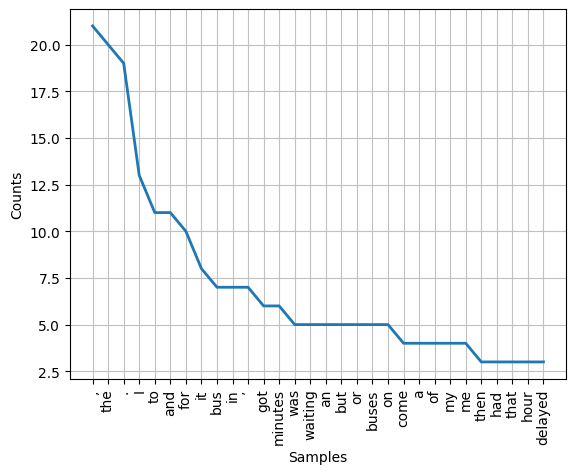

In [170]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

fdist.plot(30, cumulative = False)
plt.show()

In [171]:
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words("english"))

# Display the stop words
print(stop_words)

{'re', 'what', "wouldn't", "shouldn't", 'after', 'll', 'my', 'his', "won't", "that'll", 'shan', 'just', 'me', 'out', 'again', 'against', 'being', "doesn't", 'theirs', 'she', 'whom', 'you', 'who', 'such', 'over', 'for', 'until', 'more', 'very', "hadn't", 'or', "aren't", 'nor', 'now', 'where', "you'd", 'wouldn', "you've", 'own', 'above', 'having', 'between', 'into', 'to', 'down', 'ours', 'other', 'can', 'mustn', 'aren', "wasn't", 'have', 'how', 'so', "you're", "hasn't", 'a', "isn't", 'ma', 'before', 'i', 'myself', 'about', "don't", 'are', 'the', 'which', 'shouldn', 'our', "haven't", 'is', 'himself', 'too', 'its', 'of', 'was', 'because', 'they', 'all', 'themselves', 'same', 'yourselves', 'her', 'had', 'o', 'each', 'and', 'wasn', 'then', 'been', 'weren', 'with', 'on', 'that', 'by', 'has', "didn't", 'will', 'm', 'doesn', "it's", 'during', 'hers', 'in', 'y', 'your', 'hadn', 'haven', "weren't", 'further', 'isn', 'these', 'at', 'him', 'from', 'if', 'few', 'there', "she's", 'under', 't', 'most'

In [172]:
# Initialise an array
filtered_sent = []

# for loop for the tokenize sentences
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)

# Display the tokenize and filtered sentences
print("Tokenized Sentence:", tokenized_sent)
print("Filterd Sentence:", filtered_sent)

Tokenized Sentence: ['I', 'was', 'trying', 'to', 'go', 'to', 'the', 'square', 'from', 'kimmage', '.', 'I', 'was', 'waiting', 'for', 'the', 'bus', 'in', 'the', 'freezing', 'cold', 'and', 'kept', 'waiting', 'and', 'waiting', 'and', 'then', 'it', 'got', 'cancelled', ',', 'I', 'had', 'to', 'wait', 'for', 'the', 'next', 'bus', 'that', 'was', 'in', 'an', 'hour', '.', 'Again', 'I', 'waited', 'but', 'it', 'kept', 'getting', 'delayed', 'at', 'the', 'end', 'it', 'got', 'delayed', '30', 'minutes', 'and', 'then', 'it', 'got', 'cancelled', 'again', '!', 'And', 'so', 'I', 'wasted', '1', 'hour', 'and', '30', 'minutes', 'for', 'the', 'bus', 'that', 'didn', '’', 't', 'even', 'come', '?', 'I', '’', 'm', 'disappointed', '.', 'I', '’', 've', 'been', 'getting', 'the', 'bus', 'to', 'work', 'for', 'almost', '20', 'years', ',', 'and', 'it', 'was', 'never', 'great', ',', 'but', 'it', 'has', 'gotten', 'steadily', 'worse', 'over', 'the', 'past', 'few', 'years', 'but', 'especially', 'the', 'last', 'year', '.', 'B

In [173]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# Create an initialise an object ps by calling a method PorterStemmer()
ps = PorterStemmer()

# Initialise an array 'stemmed_words'
stemmed_words = []

# Store all the words into an array 'stemmed_words'
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

# Display the stemmed_words
print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['I', 'trying', 'go', 'square', 'kimmage', '.', 'I', 'waiting', 'bus', 'freezing', 'cold', 'kept', 'waiting', 'waiting', 'got', 'cancelled', ',', 'I', 'wait', 'next', 'bus', 'hour', '.', 'Again', 'I', 'waited', 'kept', 'getting', 'delayed', 'end', 'got', 'delayed', '30', 'minutes', 'got', 'cancelled', '!', 'And', 'I', 'wasted', '1', 'hour', '30', 'minutes', 'bus', '’', 'even', 'come', '?', 'I', '’', 'disappointed', '.', 'I', '’', 'getting', 'bus', 'work', 'almost', '20', 'years', ',', 'never', 'great', ',', 'gotten', 'steadily', 'worse', 'past', 'years', 'especially', 'last', 'year', '.', 'Buses', 'constantly', 'disappear', ',', 'come', 'extremely', 'late', '-', 'I', 'waited', 'extra', '20–30mins', 'buses', '4/5', 'evenings', 'work', 'consistently', 'since', 'September', '.', 'The', 'buses', 'morning', 'come', 'relatively', 'time', ',', 'sometimes', 'stop', '10', 'mins', '“', 'get', 'back', 'schedule', '”', 'certainly', '’', '10', 'minutes', 'early', '.', 'Was', 'pas

In [177]:
# Lexicon Normalization
# Performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Create an initialise an object 'lem' by calling a method WordNetLemmatizer()
lem = WordNetLemmatizer()

# Create an initialise an object 'stem' by calling a method PorterStemmer()
stem = PorterStemmer()

# Store the word 'flying' into string 'word'
word = "Bus"

# Display the Lemmatized and stemmed words
print("Lemmatized Word:", lem.lemmatize(word, "v"))
print("Stemmed Word:", stem.stem(word))

Lemmatized Word: Bus
Stemmed Word: bu


In [179]:
# Store a sentence into an array 'sent'
sent = "In the city center, facing Trinity College, it's pouring rain. On a Monday, waiting for bus 13 for thirty minutes. The public transportation provided by Dublin Bus is shameful."

In [181]:
# Loading NLTK
import nltk
from nltk.tokenize import sent_tokenize

# Store the 'sent' into an array 'tokens'
tokens = nltk.word_tokenize(sent)

# Display tokens
print(tokens)

['In', 'the', 'city', 'center', ',', 'facing', 'Trinity', 'College', ',', 'it', "'s", 'pouring', 'rain', '.', 'On', 'a', 'Monday', ',', 'waiting', 'for', 'bus', '13', 'for', 'thirty', 'minutes', '.', 'The', 'public', 'transportation', 'provided', 'by', 'Dublin', 'Bus', 'is', 'shameful', '.']


In [182]:
# Display the parts of speech (pos) for the words in the sentence
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
nltk.pos_tag(tokens)

[('In', 'IN'),
 ('the', 'DT'),
 ('city', 'NN'),
 ('center', 'NN'),
 (',', ','),
 ('facing', 'VBG'),
 ('Trinity', 'NNP'),
 ('College', 'NNP'),
 (',', ','),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('pouring', 'VBG'),
 ('rain', 'NN'),
 ('.', '.'),
 ('On', 'IN'),
 ('a', 'DT'),
 ('Monday', 'NNP'),
 (',', ','),
 ('waiting', 'VBG'),
 ('for', 'IN'),
 ('bus', 'NN'),
 ('13', 'CD'),
 ('for', 'IN'),
 ('thirty', 'NN'),
 ('minutes', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('public', 'JJ'),
 ('transportation', 'NN'),
 ('provided', 'VBN'),
 ('by', 'IN'),
 ('Dublin', 'NNP'),
 ('Bus', 'NNP'),
 ('is', 'VBZ'),
 ('shameful', 'JJ'),
 ('.', '.')]

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\leega\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [216]:
#Load and prepare data - sentiment analysis

df = pd.read_csv('Reviews2.csv.csv', encoding='ISO-8859-1')
df.head()

,Text,Sentiment
0,I was trying to go to the square from kimmage....,0
1,Iâve been getting the bus to work for almost...,0
2,"Constant delays, horrific scheduling, buses di...",0
3,I had gone mad all night looking for my wallet...,0
4,I am not to write this. But I am writing it an...,0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       122 non-null    object
 1   Sentiment  122 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [201]:
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0            60     60  I was trying to go to the square from kimmage....    1
1            62     62  An awful work culture at this company. It's ro...    1

In [202]:
#No duplicates no need to drop

Use CountVectorizer to vectorize the text in the DataFrame's "Text" column using a built-in dictionary of stop words. Set min_df to 20 to ignore words that appear less than 3 times in the corpus of training text. This reduces the likelihood of out-of-memory errors and will probably make the model more accurate as well. Also use the ngram_range parameter to allow CountVectorizer to rank word pairs as well as individual words.

In [203]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 3)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [205]:
text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['customer', 'long', 'poor', 'really', 'service'], dtype='<U22')]


In [206]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

In [213]:
from sklearn.linear_model import LogisticRegression

#DublinBusReviews
model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

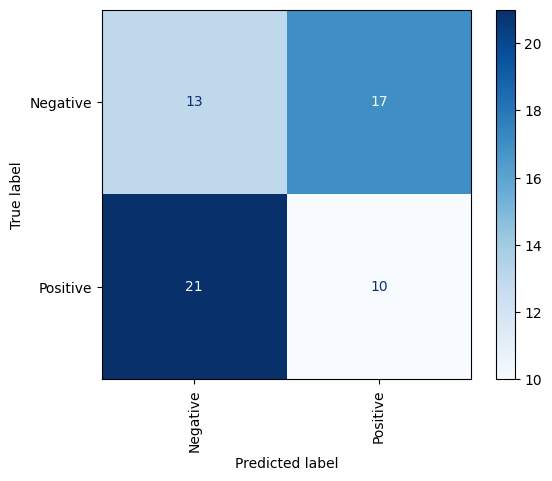

In [208]:


%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical')

In [212]:
review = 'The bus was awful, I will never take dublin bus again!.'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.38659364355636827

In [211]:
review = 'The driver was really friendly and I enjoyed my bus journey!'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.6337495586118227

In [214]:
#sentiment analysis for london bus reviews

In [218]:
df2 = pd.read_csv('reviewsLondon.csv.csv', encoding='ISO-8859-1')
df2.head()

,Text,Sentiment
0,"In London, the quality of the bus service is v...",0
1,We had a poor experience with route 9. The app...,0
2,Unbelievable bad service. The bus driver would...,0
3,One of those must do items while in London. We...,0
4,The service was incredible and reliable. If yo...,0


In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       71 non-null     object
 1   Sentiment  71 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [220]:
df2.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0            30     30  In London, the quality of the bus service is v...    1
1            41     41  Bridgette Florentino was her name, driving the...    1

In [221]:
vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 2)
x1 = vectorizer.fit_transform(df2['Text'])
y1 = df2['Sentiment']

In [223]:


x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.5, random_state=0)  

In [224]:
#LondonBusReviews
model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train1, y_train1)

LogisticRegression(max_iter=1000, random_state=0)

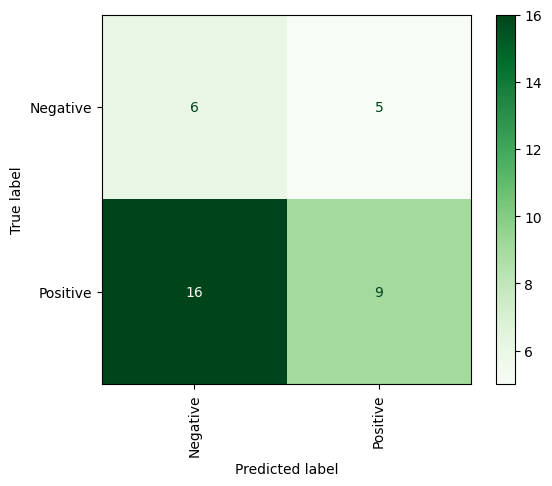

In [228]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test1, y_test1,
                   display_labels=['Negative', 'Positive'],
                   cmap='Greens', xticks_rotation='vertical')

In [229]:
review = 'The bus was awful, I will never take dublin bus again!.'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.4480619080532185

In [230]:
review = 'The driver was really friendly and I enjoyed my bus journey!'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.3385732902862454

In [234]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [240]:

from prettytable import PrettyTable

sentimentTable = PrettyTable()

sentimentTable.field_names = ["City", "PP", "PN", "NP", "NN", "Positive prediciton", "Negative prediction"]
sentimentTable.add_row(["Dublin", 10,21,17,13, 0.6337,0.3865])
sentimentTable.add_row(["London", 9,16,5,6, 0.3385,0.4480])
print(sentimentTable)

+--------+----+----+----+----+---------------------+---------------------+
|  City  | PP | PN | NP | NN | Positive prediciton | Negative prediction |
+--------+----+----+----+----+---------------------+---------------------+
| Dublin | 10 | 21 | 17 | 13 |        0.6337       |        0.3865       |
| London | 9  | 16 | 5  | 6  |        0.3385       |        0.448        |
+--------+----+----+----+----+---------------------+---------------------+


In [241]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [243]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

In [244]:
root= tk.Tk()
  
canvas1 = tk.Canvas(root, width = 800, height = 300)
canvas1.pack()

label1 = tk.Label(root, text='Graphical User Interface')
label1.config(font=('Arial', 20))
canvas1.create_window(400, 50, window=label1)
   
entry1 = tk.Entry (root)
canvas1.create_window(400, 100, window=entry1) 
  
entry2 = tk.Entry (root)
canvas1.create_window(400, 120, window=entry2) 
          
entry3 = tk.Entry (root)
canvas1.create_window(400, 140, window=entry3) 

4

In [245]:
def create_charts():
    global x1
    global x2
    global x3
    global bar1
    global pie2
    x1 = float(entry1.get())
    x2 = float(entry2.get())
    x3 = float(entry3.get())

    figure1 = Figure(figsize=(4,3), dpi=100) 
    subplot1 = figure1.add_subplot(111) 
    xAxis = [float(x1),float(x2),float(x3)] 
    yAxis = [float(x1),float(x2),float(x3)] 
    subplot1.bar(xAxis,yAxis, color = 'lightsteelblue') 
    bar1 = FigureCanvasTkAgg(figure1, root) 
    bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=0)
      
    figure2 = Figure(figsize=(4,3), dpi=100) 
    subplot2 = figure2.add_subplot(111) 
    labels2 = 'Label1', 'Label2', 'Label3' 
    pieSizes = [float(x1),float(x2),float(x3)]
    my_colors2 = ['lightblue','lightsteelblue','silver']
    explode2 = (0, 0.1, 0)  
    subplot2.pie(pieSizes, colors=my_colors2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90) 
    subplot2.axis('equal')  
    pie2 = FigureCanvasTkAgg(figure2, root)
    pie2.get_tk_widget().pack()

In [246]:
def clear_charts():
    bar1.get_tk_widget().pack_forget()
    pie2.get_tk_widget().pack_forget()

In [247]:
button1 = tk.Button (root, text=' Create Charts ',command=create_charts, bg='palegreen2', font=('Arial', 11, 'bold')) 
canvas1.create_window(400, 180, window=button1)

button2 = tk.Button (root, text='  Clear Charts  ', command=clear_charts, bg='lightskyblue2', font=('Arial', 11, 'bold'))
canvas1.create_window(400, 220, window=button2)

button3 = tk.Button (root, text='Exit Application', command=root.destroy, bg='lightsteelblue2', font=('Arial', 11, 'bold'))
canvas1.create_window(400, 260, window=button3)

7

In [248]:
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\leega\anaconda3\envs\notebook\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\leega\AppData\Local\Temp\ipykernel_10372\4145644008.py", line 7, in create_charts
    x1 = float(entry1.get())
ValueError: could not convert string to float: ''
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\leega\anaconda3\envs\notebook\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\leega\AppData\Local\Temp\ipykernel_10372\2868086802.py", line 2, in clear_charts
    bar1.get_tk_widget().pack_forget()
NameError: name 'bar1' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\leega\anaconda3\envs\notebook\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\leega\AppData\Local\Temp\ipykernel_10372\4145644008.py", line 1